In [1]:
import requests
from datetime import datetime
from datetime import timedelta

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
lat = "-34.577214787893645"
lon = "-58.45574860378882"
part = "alerts"
API_KEY = "fb1764a5729d871a7ac8d937ba8d2bb8"

url = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={API_KEY}" # &exclude={part}

In [64]:
res = requests.get(url)

In [65]:
res

<Response [200]>

In [5]:
res_json = res.json()

In [6]:
res_json

{'lat': -34.5772,
 'lon': -58.4557,
 'timezone': 'America/Argentina/Buenos_Aires',
 'timezone_offset': -10800,
 'current': {'dt': 1635043966,
  'sunrise': 1634979689,
  'sunset': 1635027267,
  'temp': 288.13,
  'feels_like': 286.96,
  'pressure': 1012,
  'humidity': 49,
  'dew_point': 277.52,
  'uvi': 0,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 0.45,
  'wind_deg': 135,
  'wind_gust': 3.13,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}]},
 'minutely': [{'dt': 1635043980, 'precipitation': 0},
  {'dt': 1635044040, 'precipitation': 0},
  {'dt': 1635044100, 'precipitation': 0},
  {'dt': 1635044160, 'precipitation': 0},
  {'dt': 1635044220, 'precipitation': 0},
  {'dt': 1635044280, 'precipitation': 0},
  {'dt': 1635044340, 'precipitation': 0},
  {'dt': 1635044400, 'precipitation': 0},
  {'dt': 1635044460, 'precipitation': 0},
  {'dt': 1635044520, 'precipitation': 0},
  {'dt': 1635044580, 'precipitation': 0},
  {'dt': 1635044640

In [7]:
current_weather = res_json["current"]
current_weather

{'dt': 1635043966,
 'sunrise': 1634979689,
 'sunset': 1635027267,
 'temp': 288.13,
 'feels_like': 286.96,
 'pressure': 1012,
 'humidity': 49,
 'dew_point': 277.52,
 'uvi': 0,
 'clouds': 0,
 'visibility': 10000,
 'wind_speed': 0.45,
 'wind_deg': 135,
 'wind_gust': 3.13,
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}]}

In [10]:
def handle_time(time):
    
    gtm_time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    
    given_time = datetime.strptime(gtm_time, "%Y-%m-%d %H:%M:%S")

    gtm__3 = 3
    
    final_time = given_time - timedelta(hours=gtm__3)

    final_time = final_time.strftime('%d/%m/%Y %H:%M:%S')
    
    return final_time

In [11]:
handle_time(1634845247)

'21/10/2021 16:40:47'

In [12]:
temp_c = current_weather["temp"]
temp_c -= 273.15
temp_c

14.980000000000018

In [13]:
hourly_res = res_json["hourly"]

hourly_res = hourly_res[1]

print(hourly_res)

# print(len(res_json["hourly"]))

{'dt': 1635044400, 'temp': 288.13, 'feels_like': 286.96, 'pressure': 1012, 'humidity': 49, 'dew_point': 277.52, 'uvi': 0, 'clouds': 0, 'visibility': 10000, 'wind_speed': 6.77, 'wind_deg': 167, 'wind_gust': 12.88, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'pop': 0}


In [14]:
handle_time(hourly_res["dt"])

'24/10/2021 00:00:00'

In [15]:
x = hourly_res["weather"][0]["main"]
y = hourly_res["weather"][0]["description"]

In [16]:
hourly_res["temp"] - 273.15

14.980000000000018

In [17]:
two_days = res_json["hourly"]

two_days_info = dict()

for i, hour in enumerate(two_days):
    
    temp = hour["temp"] - 273.15
    pressure = hour["pressure"]
    humidity = hour["humidity"]
    uvi = hour["uvi"]
    clouds = hour["clouds"] # % de nubes
    wind_speed = hour["wind_speed"]
    weather = hour["weather"][0]["main"]
    weather_desc = hour["weather"][0]["description"]
    
    two_days_info[i] = [temp, pressure, humidity, uvi, clouds, wind_speed, weather, weather_desc]

In [18]:
print(two_days_info[0])
print(two_days_info[1])

[15.090000000000032, 1012, 50, 0, 0, 5.72, 'Clear', 'clear sky']
[14.980000000000018, 1012, 49, 0, 0, 6.77, 'Clear', 'clear sky']


In [34]:
data = [t for t in two_days_info.values()]

In [38]:
df = pd.DataFrame(data, columns=["temperature", "pressure", "humidity", "uvi", "clouds", "wind_speed", "weather", "weather_desc"])

In [39]:
df.head()

,temperature,pressure,humidity,uvi,clouds,wind_speed,weather,weather_desc
0,15.09,1012,50,0.0,0,5.72,Clear,clear sky
1,14.98,1012,49,0.0,0,6.77,Clear,clear sky
2,14.64,1012,51,0.0,0,6.06,Clear,clear sky
3,14.00,1012,52,0.0,0,4.94,Clear,clear sky
4,13.09,1013,54,0.0,0,3.47,Clear,clear sky


In [40]:
temp_ = df["temperature"]

Text(0, 0.5, 'Temperature')

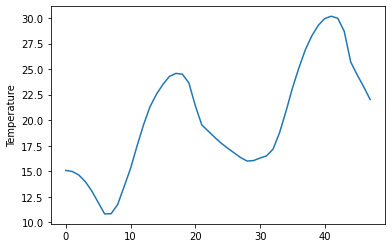

In [46]:
plt.plot(temp_)
plt.ylabel("Temperature")

In [70]:
# https://www.unixtimestamp.com/

start = "1420077600" # 1/1/2015 00:00:00
end = "1609470000" # 1/1/2021 00:00:00


history_url = f"http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&appid={API_KEY}"
# &start={start}&end={end}&type=hour

In [71]:
history_url_res = requests.get(history_url)

In [73]:
history_url_res

<Response [401]>